### DSTA Live coding experience

#### Part B: Implementing Decision Trees from Python up

__This notebook requires the dataset file 'mushroom.csv' also available from the repo__

In [1]:
"""
The code will run on dataset file DATAFILE 
and print a barchart reporting the accuracy achieved by 
segmenting individual features (it runs 22 times).
"""

import pandas as pd

from math import log2

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn import tree

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# this can be changed to reflect the exact location of the dataset file
DATAFILE = '../data/mushrooms.csv'

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

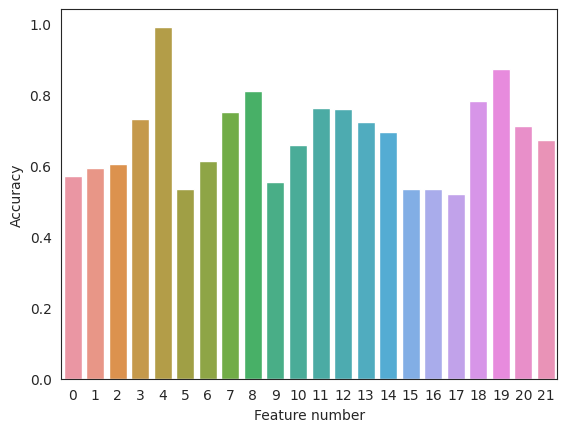

In [4]:


class DecisionTree(object):
    """
       DecisionTree Class implements ID3 and CART.
    """

    def __init__(self, criterion='entropy'):
        """
           Decision Tree constructor.
        Parameters
        ----------
        criterion : str
            The criterion is set by default to 'entropy'. 
            Possible values are 'entropy' and 'gini'. 
            The criterion is used when we calculate the
            Gain on each feature selection.
        """

        self.tree = None  # default model tree

        self.features = None  # default features array

        self.target = None  # default model target

        self.criterion = criterion

    def fit(self, X: pd.DataFrame, y: pd.Series, features: []):
        """
           Short summary.
        Parameters
        ----------
        X : pd.DataFrame
            Predictors pandas DataFrame.
        y : pd.Series
            Target true values DataSerie.
        features : []
            Array of `features` to use in model.
        Returns
        -------
        dict
            Dictionary object containing the tree representation.
        """
        data = pd.concat([X, y], axis=1)
        self.features = features
        self.target = y.name
        self.tree = self.build_tree(data, features)

        return self.tree

    def predict(self, X: pd.DataFrame):
        """
           Predict the target based on X features.
        Parameters
        ----------
        X : pd.DataFrame
            Predictors pandas DataFrame.
        Returns
        -------
        pd.Serie
            DataSerie corresponding to the actual predictions.
        """
        results = []
        for index, datapoint in X.iterrows():
            results.append(self.classify(self.tree, datapoint))

        return pd.Series(results, index=X.index, dtype='int', name=self.target)

    def accuracy(self, y_true: pd.Series, y_predicted: pd.Series):
        """
           Calculate the accuracy of the decision tree.
        Parameters
        ----------
        y_true : pd.Series
            The target true values.
        y_predicted : pd.Series
            The target predicted values.
        Returns
        -------
        float
            The actual DT accuracy rounded to 4 decimals.
        """
        y_check = y_true == y_predicted

        return round(y_check.sum() / len(y_check), 4)

    def classify(self, tree, datapoint):
        """
           Classify a specific data entry.
        Parameters
        ----------
        tree : {}
            Dictionary object containing the tree representation.
        datapoint : object
            datapoint containing the features.
        Returns
        -------
        type
            Corresponding class predicted associated to datapoint.
        """
        if type(tree) == dict:
            first_feature = list(tree.keys())[0]

            try:
                subtree = tree[first_feature][datapoint[first_feature]]
                return self.classify(subtree, datapoint)
            except Exception:
                return False
        else:
            return tree

    def calc_entropy(self, p):
        """
           Calculate the entropy for a specific feature.
        Parameters
        ----------
        p : type
            Description of parameter `p`.
        Returns
        -------
        type
            Description of returned object.
        """
        if p != 0:
            return -p * log2(p)
        else:
            return 0

    def calc_info_gain(self, data: pd.DataFrame, feature: str):
        """
           Calculate the entropy gain in ID3 for a specific feature.
        Parameters
        ----------
        data : pd.DataFrame
            Data used to calculate the entropy gain.
        feature : str
            The feature name.
        Returns
        -------
        float
            The corresping entropy gain for the specified feature.
        """

        gain = 0
        data_len = len(data)
        feature_values = {}
        classes = {}

        # Loop and get distinct feature value.
        for index, datapoint in data.iterrows():
            #get the individual data feature and its target.
            #For example: 'cap-shape' value and the class
            """
            For example for cap-shape feature we will get counts
            cap-shape
            {
             0: {'count': 398, 'classes': {0: 355, 1: 43}},
             1: {'count': 4, 'classes': {1: 4}},
             2: {'count': 2807, 'classes': {1: 1388, 0: 1419}},
             3: {'count': 771, 'classes': {1: 556, 0: 215}},
             4: {'count': 29, 'classes': {0: 29}},
             5: {'count': 3302, 'classes': {1: 1545, 0: 1757}}
            }
            """
            data_cls = datapoint[self.target]
            data_ft = datapoint[feature]
        
            if data_ft in feature_values.keys():
                feature_values[data_ft]['count'] += 1
        
                if data_cls in feature_values[data_ft]['classes'].keys():
                    feature_values[data_ft]['classes'][data_cls] += 1
                else:
                    feature_values[data_ft]['classes'][data_cls] = 1
            else:
                feature_values[data_ft] = {}
                feature_values[data_ft]['count'] = 1
                feature_values[data_ft]['classes'] = {}
                feature_values[data_ft]['classes'][data_cls] = 1
        
            # Count classes for this feature
            if data_cls in classes.keys():
                classes[data_cls] += 1
            else:
                classes[data_cls] = 1
        
        #print(feature)
        #print(feature_values)
        #print(classes)
         # Loop through all possible feature values and calculate corresponding
        # feature_value / class map.
        feat_entropy_sum = 0
        
        for feature_val, feature_stats in feature_values.items():
            feat_entropy = 0
        
            for feat_class, feat_count in feature_stats['classes'].items():
                feature_prob = feat_count / feature_stats['count']
                feat_entropy += self.calc_entropy(feature_prob)
        
            feat_entropy_sum += (feature_stats['count']/data_len)*feat_entropy

        # Calculate Entropy
        entropy = 0
        #print("*****************************************")
        #print(classes)
        #print("*****************************************")
        for class_name, class_count in classes.items():
            class_prob = class_count / data_len
            entropy += self.calc_entropy(class_prob)

        # Calc gain based on ID3 formulae
        gain = entropy - feat_entropy_sum
        #print("Entropy of classes", entropy)
        #print(feat_entropy_sum)
        #print(gain)
        return gain

    def build_tree(self, data: pd.DataFrame, features: []):
        """
           Build the DecisionTree representation.
        Parameters
        ----------
        data : pd.DataFrame
            Data used to build Decision Tree model.
        features : []
            Array of `features` to use in model.
        Returns
        -------
        {}
            Dictionary object containing the tree representation.
        """

        gains = []

        tree = {}

        # calculate default classe based on the most present class
        default = data[self.target].value_counts(sort=True).index[0]

        # Doing this as to prevent features alteration.
        copy_features = features.copy()

        if copy_features:
            for feature in copy_features:
                gains.append(self.calc_info_gain(data, feature))
            ft_gains = list(zip(features, gains))

            max = sorted(ft_gains, key=lambda x: x[1], reverse=True)[0]
            best_feature = max[0]
            best_feature_values = data[best_feature].unique()

            # Remove best feature from features list
            copy_features.remove(max[0])

            for best_feature_value in best_feature_values:
                feature_data = data[data[best_feature] == best_feature_value]
                # print(best_feature_value)
                subtree = self.build_tree(feature_data, copy_features)
                if best_feature in tree.keys():
                    tree[best_feature][best_feature_value] = subtree
                else:
                    tree[best_feature] = {}
                    tree[best_feature][best_feature_value] = subtree
            return tree
        else:
            return default
    
    def print_tree(self, tree: {}, prefix=''):
        """Print tree object representation.
        Parameters
        ----------
        tree : {}
            The tree dict to print.
        prefix : str
            Line prefix.
        Returns
        -------
        type
            Description of returned object.
        """
        if type(tree) == dict:
            for key in tree.keys():
                print(prefix, key)
                for item in tree[key].keys():
                    print(prefix, item)
                    self.print_tree(tree[key][item], prefix + "\t")
    
        else:
            print(prefix, "\t->\t", tree)

def bar_plot_feature_accuracies( X_train, y_train, X_test, y_test, features):
    """Plot accuracies for each feature
    Parameters
    ----------
    X_train, y_train, X_test, y_test: Dataframe
        Train and test data
    features: list
        A list of features to be experimented with
    Returns
    -------
    None
    """
    
    dtree=DecisionTree()
    acuracies=[]
    print(features)
    for ft in features:
        if ft=='class':
            continue
        else:
            fts=[ft]
            clf=dtree.fit(X_train,y_train,fts)
            y_pred=dtree.predict(X_test)
            acuracies.append(dtree.accuracy(y_test, y_pred))
    
    data = np.array(acuracies)
    x = np.arange(len(acuracies))
    width = 0.2  # width of bar
    sns.axes_style('white')
    sns.set_style('white')
    ax = sns.barplot(x=x, y=data)
    ax.set(xlabel='Feature number', ylabel='Accuracy')
    plt.show()

def main(ifname):
    """Load decision tree model and model's perform accuracy test
    Parameters
    ----------
    ifname: str
        The data file name
    Returns
    -------
    None
    """
    
    #Load dataset using pandas
    df = pd.read_csv(ifname)
    
    #check the first few rows in the dataset
    print(df.head())
    
    #Check usnique classes of the dataset
    print(df['class'].unique())
    #Use labelencoder to covert categries of features into ordianl value_counts
    
    labelencoder=LabelEncoder()
    
    for column in df.columns:
        df[column] = labelencoder.fit_transform(df[column])
    
    #Check columns after converting to ordinal values
    print(df.head())
    
    #get the features into X by dropping the target class
    X = df.drop(['class'], axis=1)
    
    #Take the target classes from datafram into y
    y = df['class']
    
    #Split dataset into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
    
    #Call Decision Tree
    dtree=DecisionTree()
    
    #Get the feature columns into a list that we want to use
    #You can add more columns here
    features=['cap-shape', 'cap-surface', 'cap-color']
    
    #Train the model
    clf=dtree.fit(X_train,y_train,features)
    #Print the tree if you want
    #tree.print_tree(tree.tree)
    #Get the predictions
    
    y_pred=dtree.predict(X_test)
    print("Accuracy using only cap-shape feature is:", dtree.accuracy(y_test, y_pred))
    features=list(df)
    
    #Plot feature by feature accuracies
    bar_plot_feature_accuracies( X_train, y_train, X_test, y_test,features)


if __name__ == '__main__':
    # this allows you to pass the file name as the first argument when you call
    # your script from the command line
    # so to run this script use:
    main(DATAFILE)
